In [3]:
# standard imports
import gc

# data manipulation imports
import numpy as np
import pandas as pd

# data saving imports
import pickle
import os

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib

# custom imports
from regression_class import RedditRegression as RR

# Run order
1. 26_1_run_log_regressions_multiprocessing : runs all required regressions
2. 26_2_output_graphs : outputs standard graphs and metrics for each regression
3. 26_3_get_lite_files : creates lite version of files (without copies of in dataframes used in regressions) for plotting, metrics etc
4. 26_4_get_all_plotting_metrics.py : creates .p file of all plotting metrics for easy access

In [38]:
# the other 26 file (.py) must be run to run all required regressions

# outfiles
graph_outdir = 'logistic_regression/logregs_26102023/graphs'

# infile parent dir
working_dir = 'logistic_regression/logregs_26102023'

# infile
infile = 'logistic_regression/logregs_26102023/plotting_metrics.p'

In [39]:
if not os.path.isdir(graph_outdir):
    os.mkdir(graph_outdir)

In [5]:
metrics = pickle.load(open(infile, 'rb'))

In [45]:
def plot_metrics_over_multi_collection_windows(thresholded_metrics, author_threshold,
                                               figsize=(20,20), x='index', y='auc',
                                               fontsize=18, save=False, show=True):
    """

    Parameters
    ----------
    thresholded_metrics : dict
        Expect dict of type {collection_window_size: {subreddit: {}}}
    """
    matplotlib.rcParams.update({'font.size': fontsize})
    plt_colours = list(mcolors.TABLEAU_COLORS.keys())
    fig, axes = plt.subplots(2,2, figsize=figsize)
    subreddit_axes = {
        'books': (1,1),
        'politics': (0,0),
        'crypto': (0,1),
        'conspiracy': (1,0),
    }
    x_name = {
        'index': 'number of features',
        'x_names': 'features (cumulative)'
    }

    i=0
    for collection_window in thresholded_metrics:
        for subreddit in subreddit_axes:
            axes[subreddit_axes[subreddit]].plot(
                thresholded_metrics[collection_window][subreddit][x],
                thresholded_metrics[collection_window][subreddit][y],
                color=plt_colours[i],
                label=f"{collection_window}"
            )
            axes[subreddit_axes[subreddit]].set_ylabel(y)
            axes[subreddit_axes[subreddit]].set_xlabel(x_name[x])
            axes[subreddit_axes[subreddit]].set_title(f"{subreddit} {y} vs {x_name[x]}")
            #axes[subreddit_axes[subreddit]].legend()
        i += 1

    handles, labels = axes[0,0].get_legend_handles_labels()
    order = np.argsort([int(x) for x in labels])
    fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='data collection\nwindow')
    fig.suptitle(f"AUC vs number of features with author activity thresholded at {author_threshold}", fontsize=int(fontsize*1.4))
    if save:
        plt.savefig(f"{graph_outdir}/auc_vs_feats_auth_thresh_{author_threshold}.png")
    if show:
        plt.show()
    else:
        plt.clf()

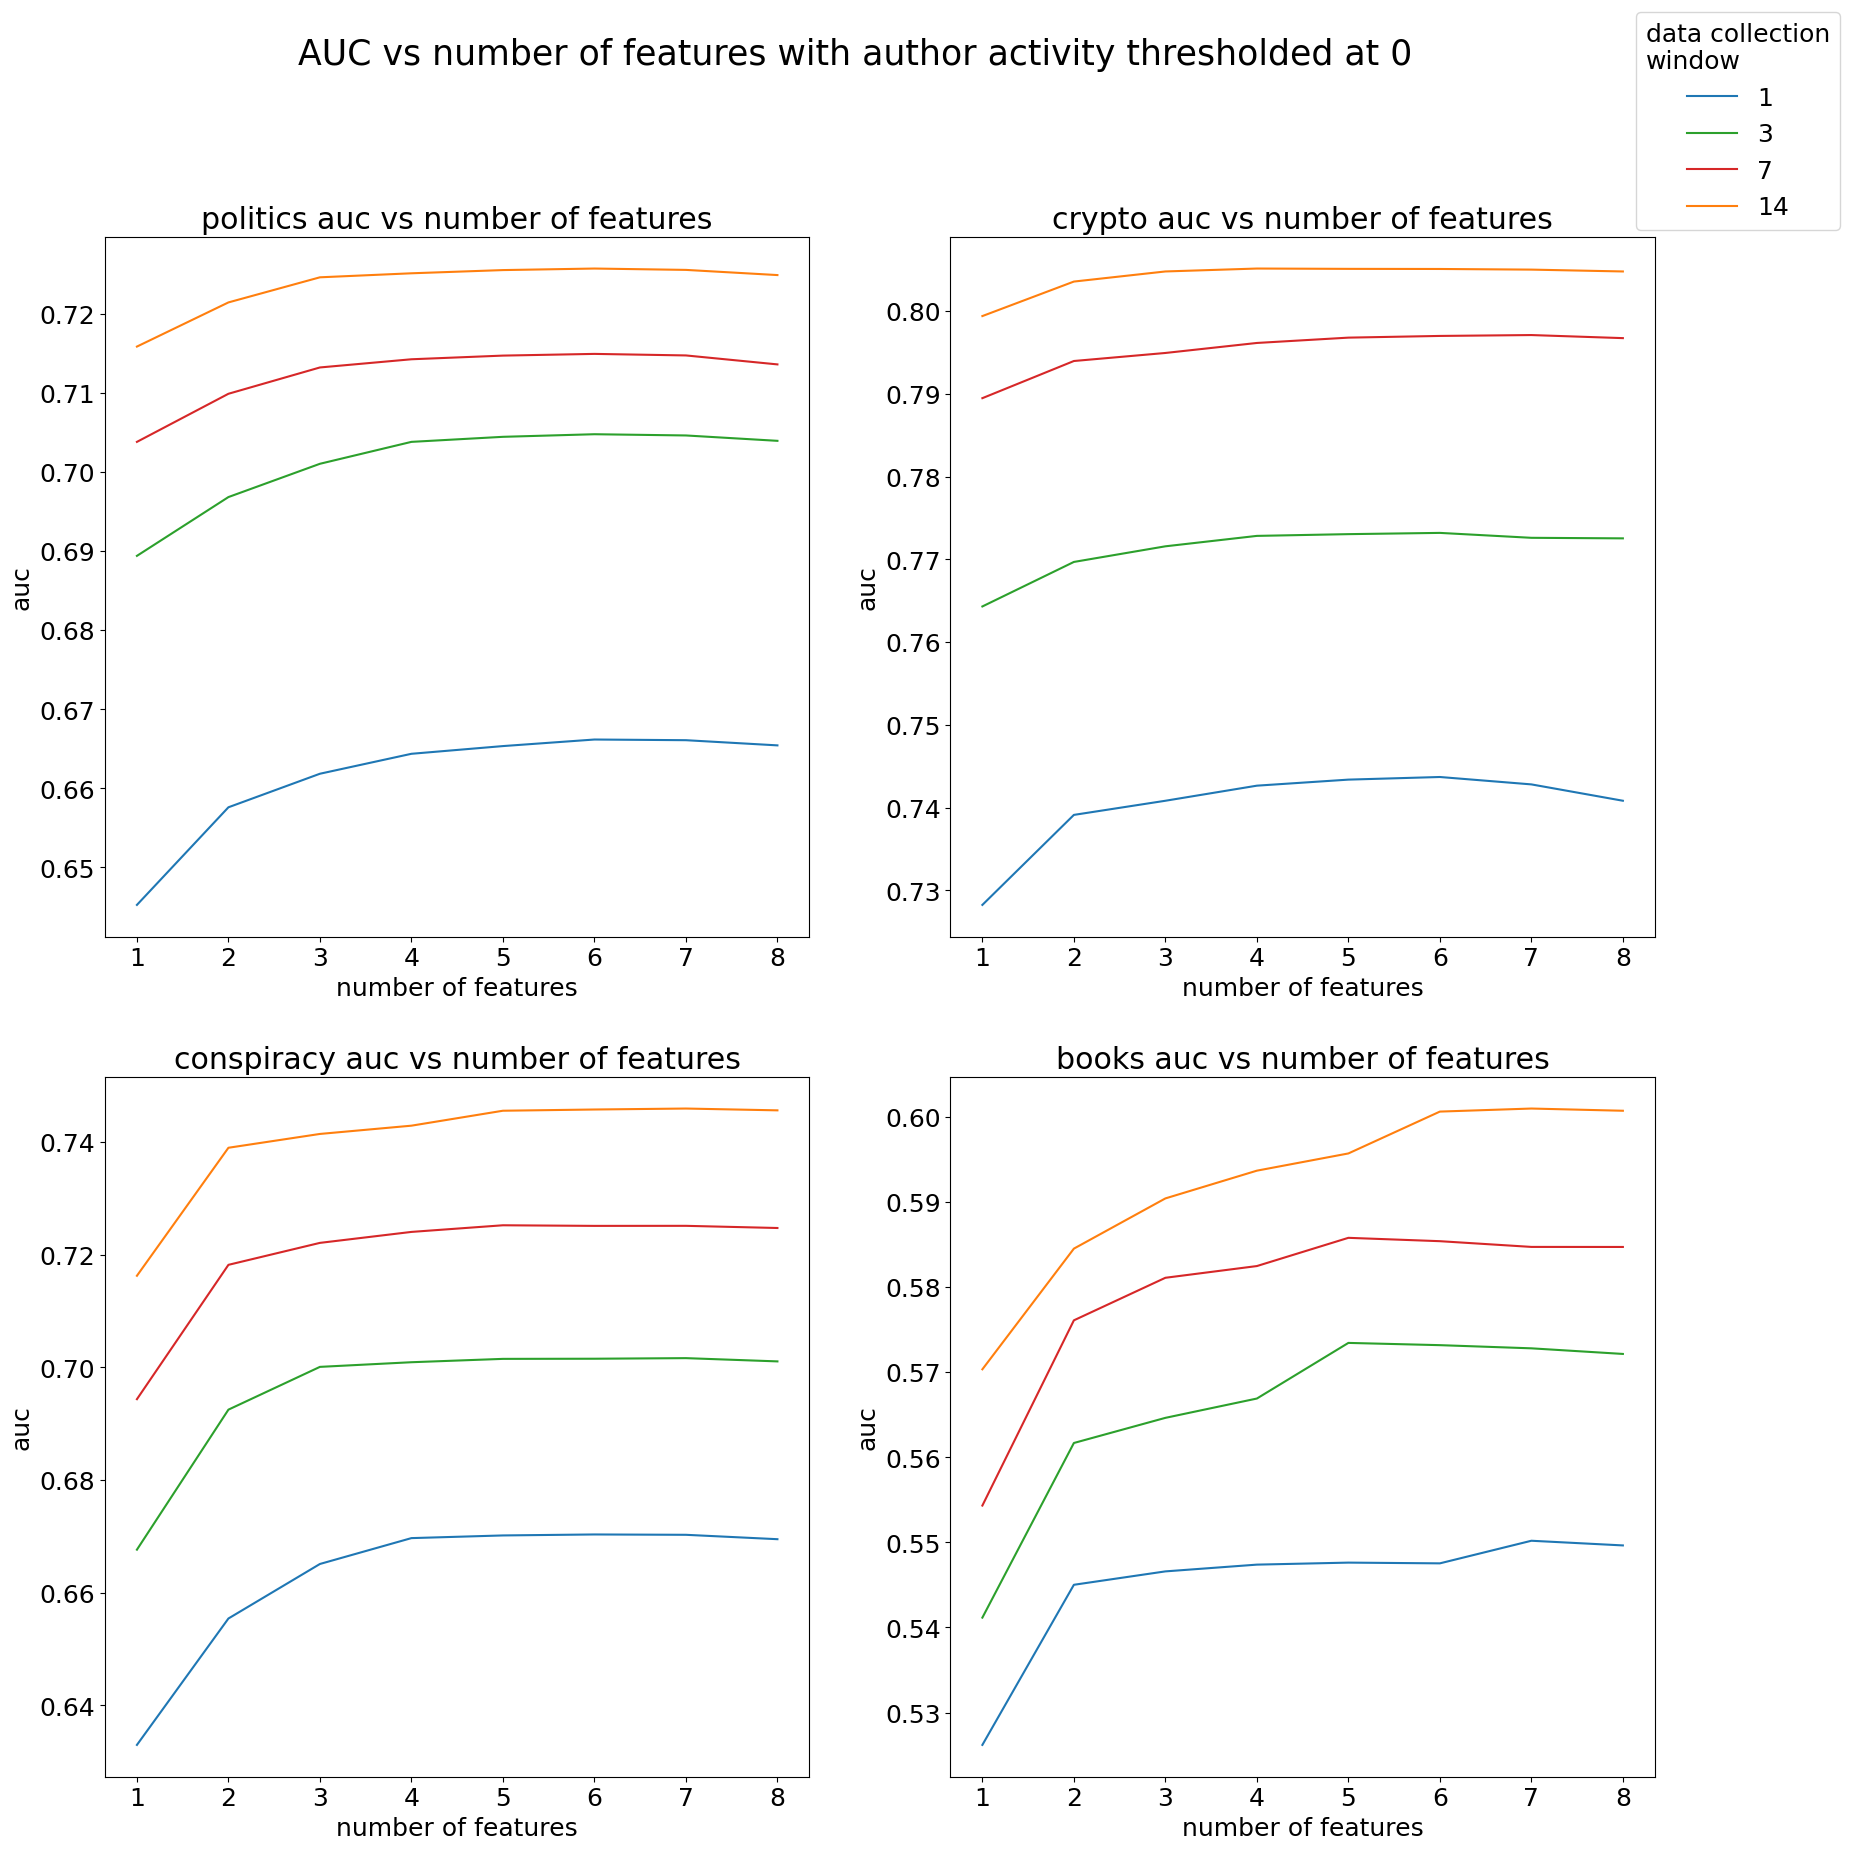

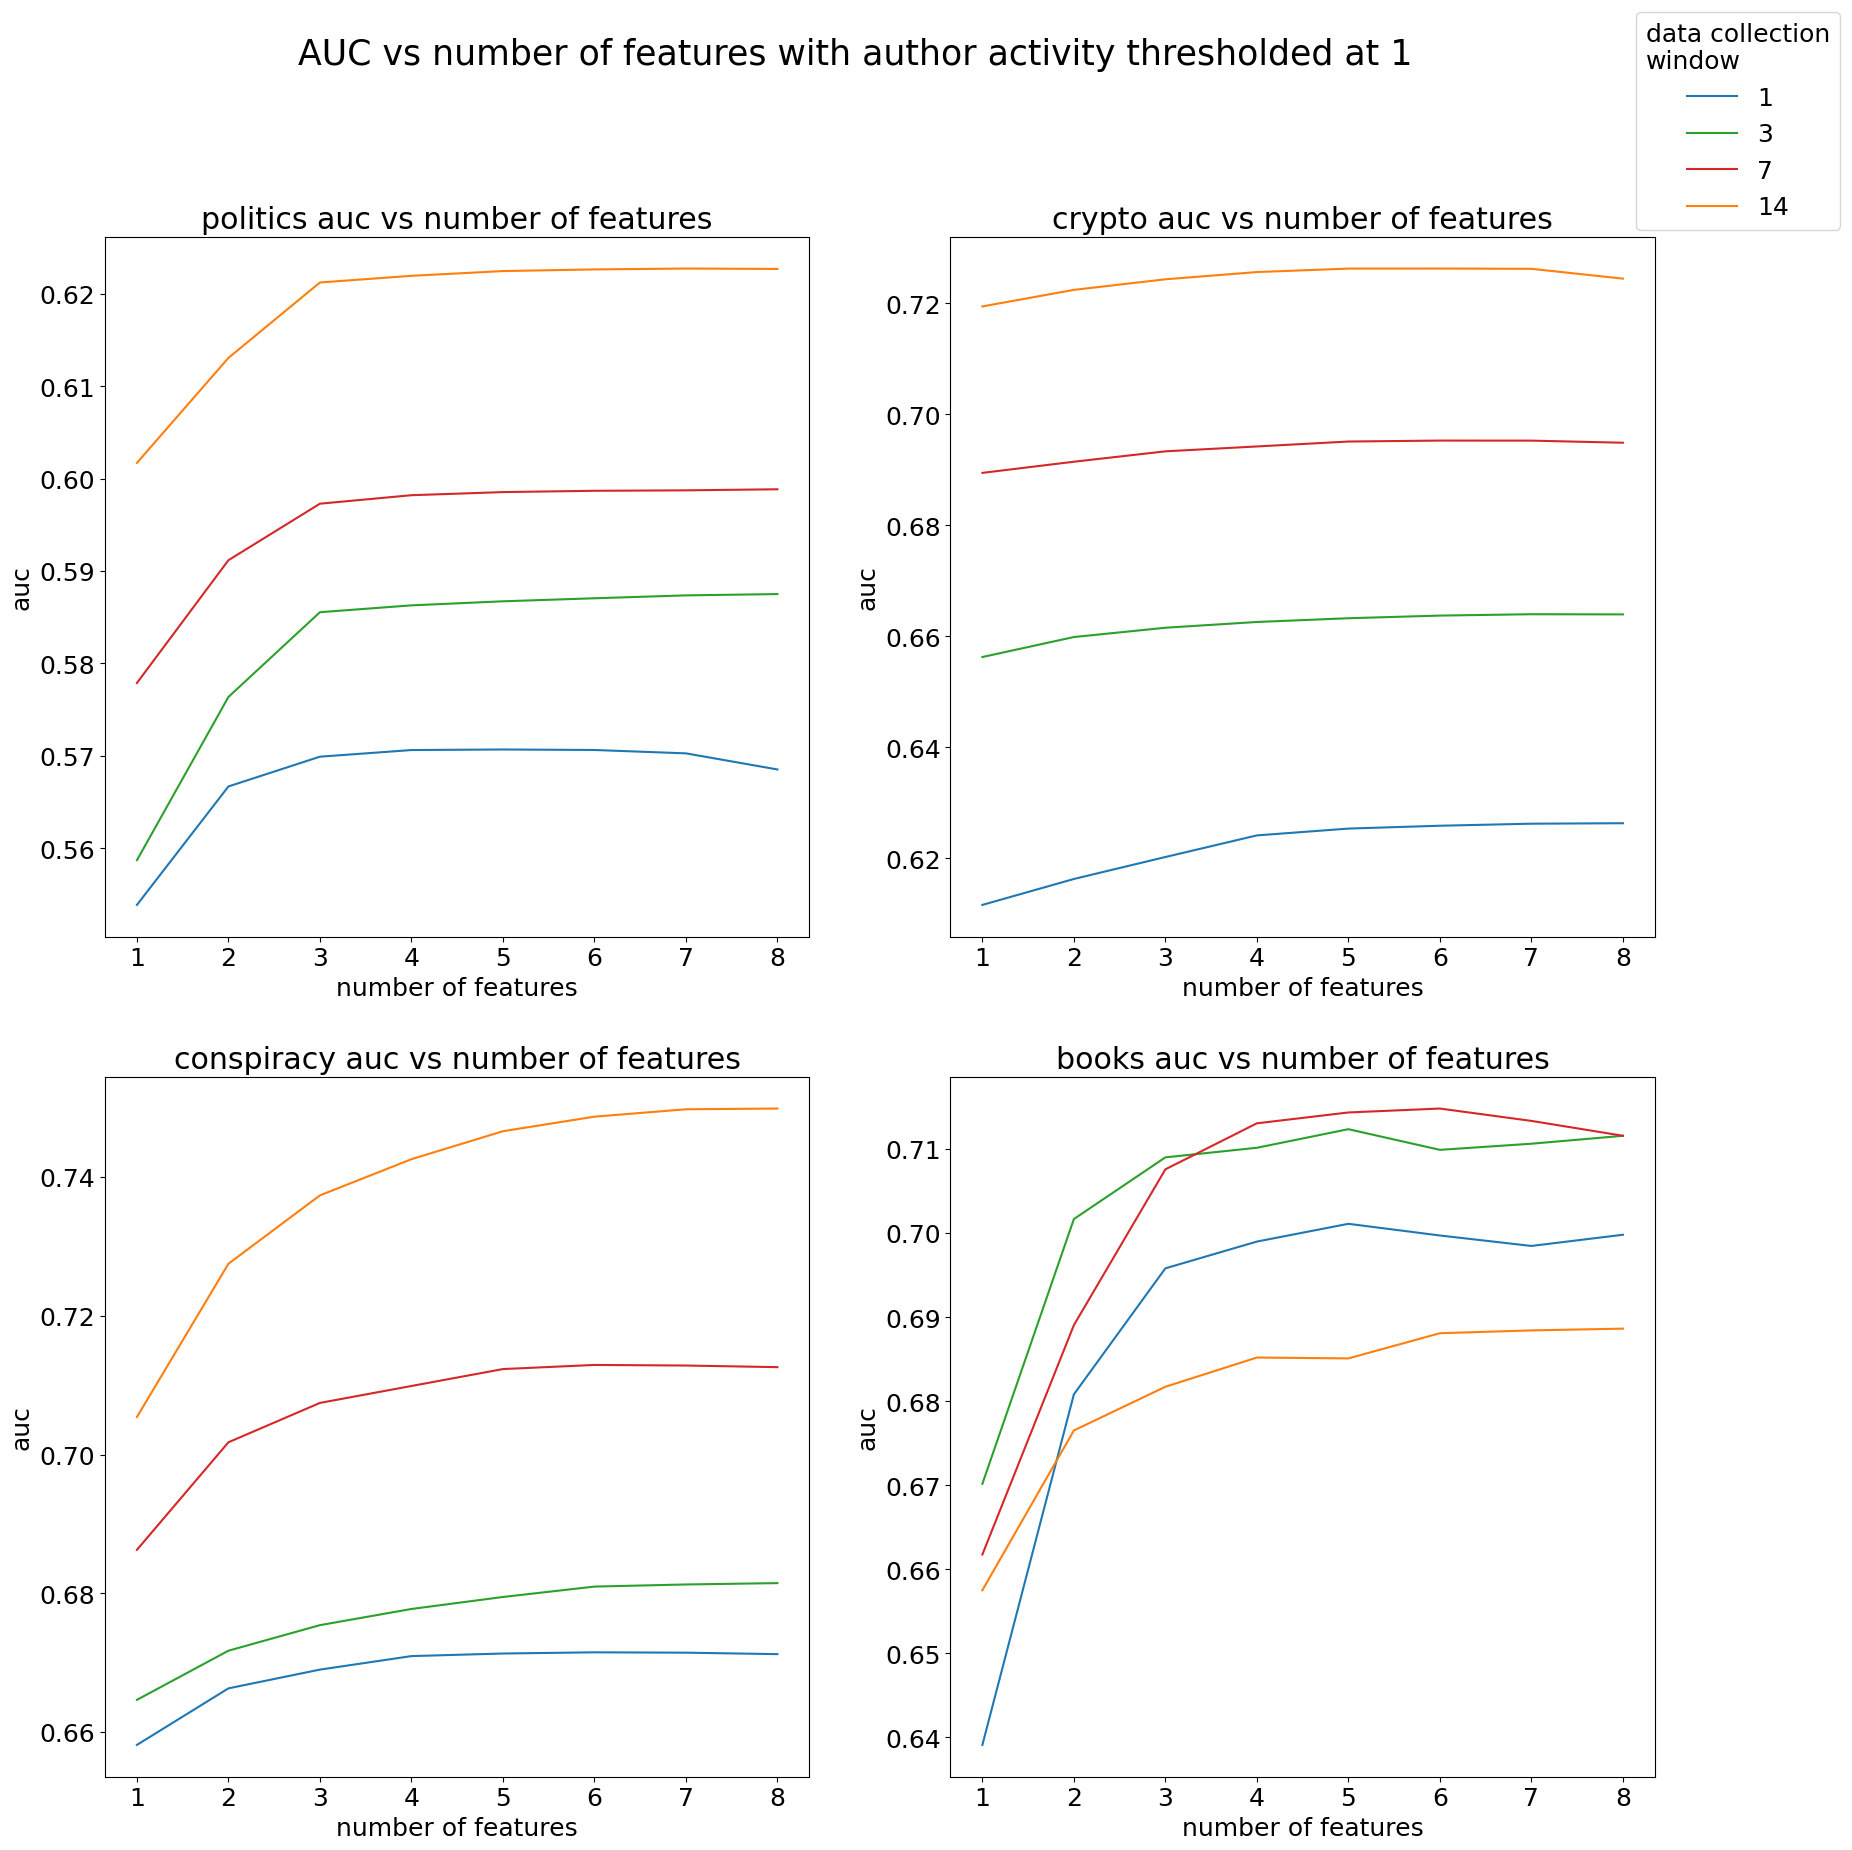

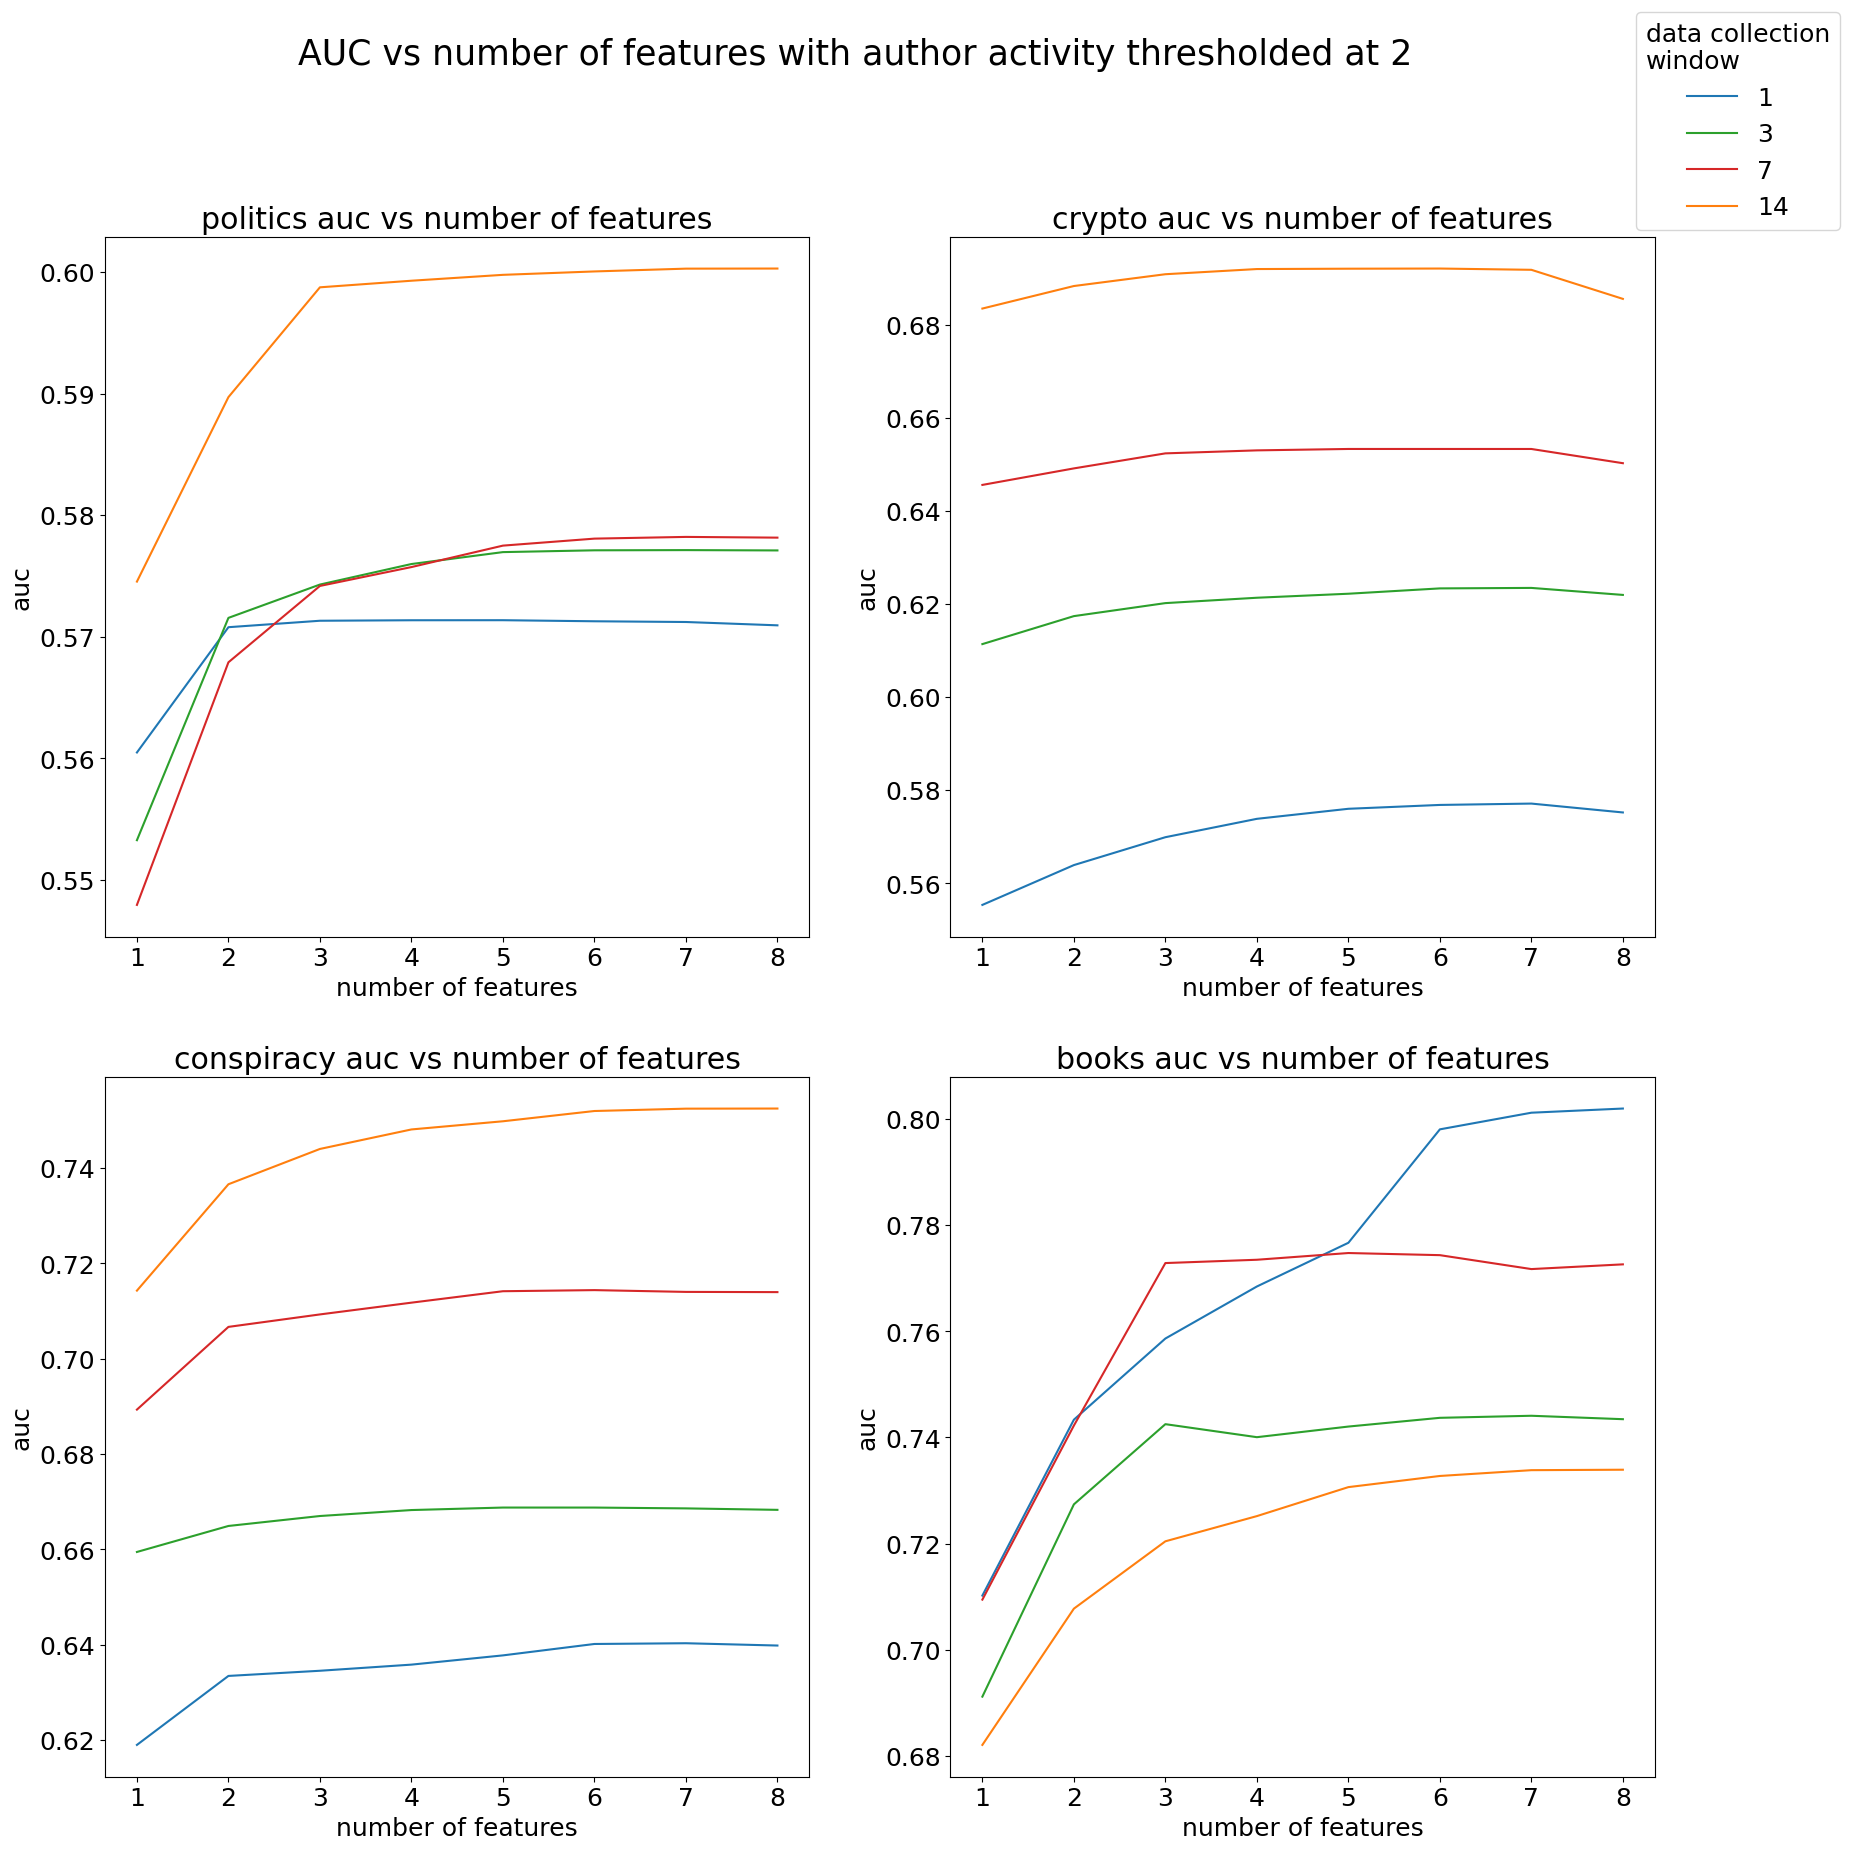

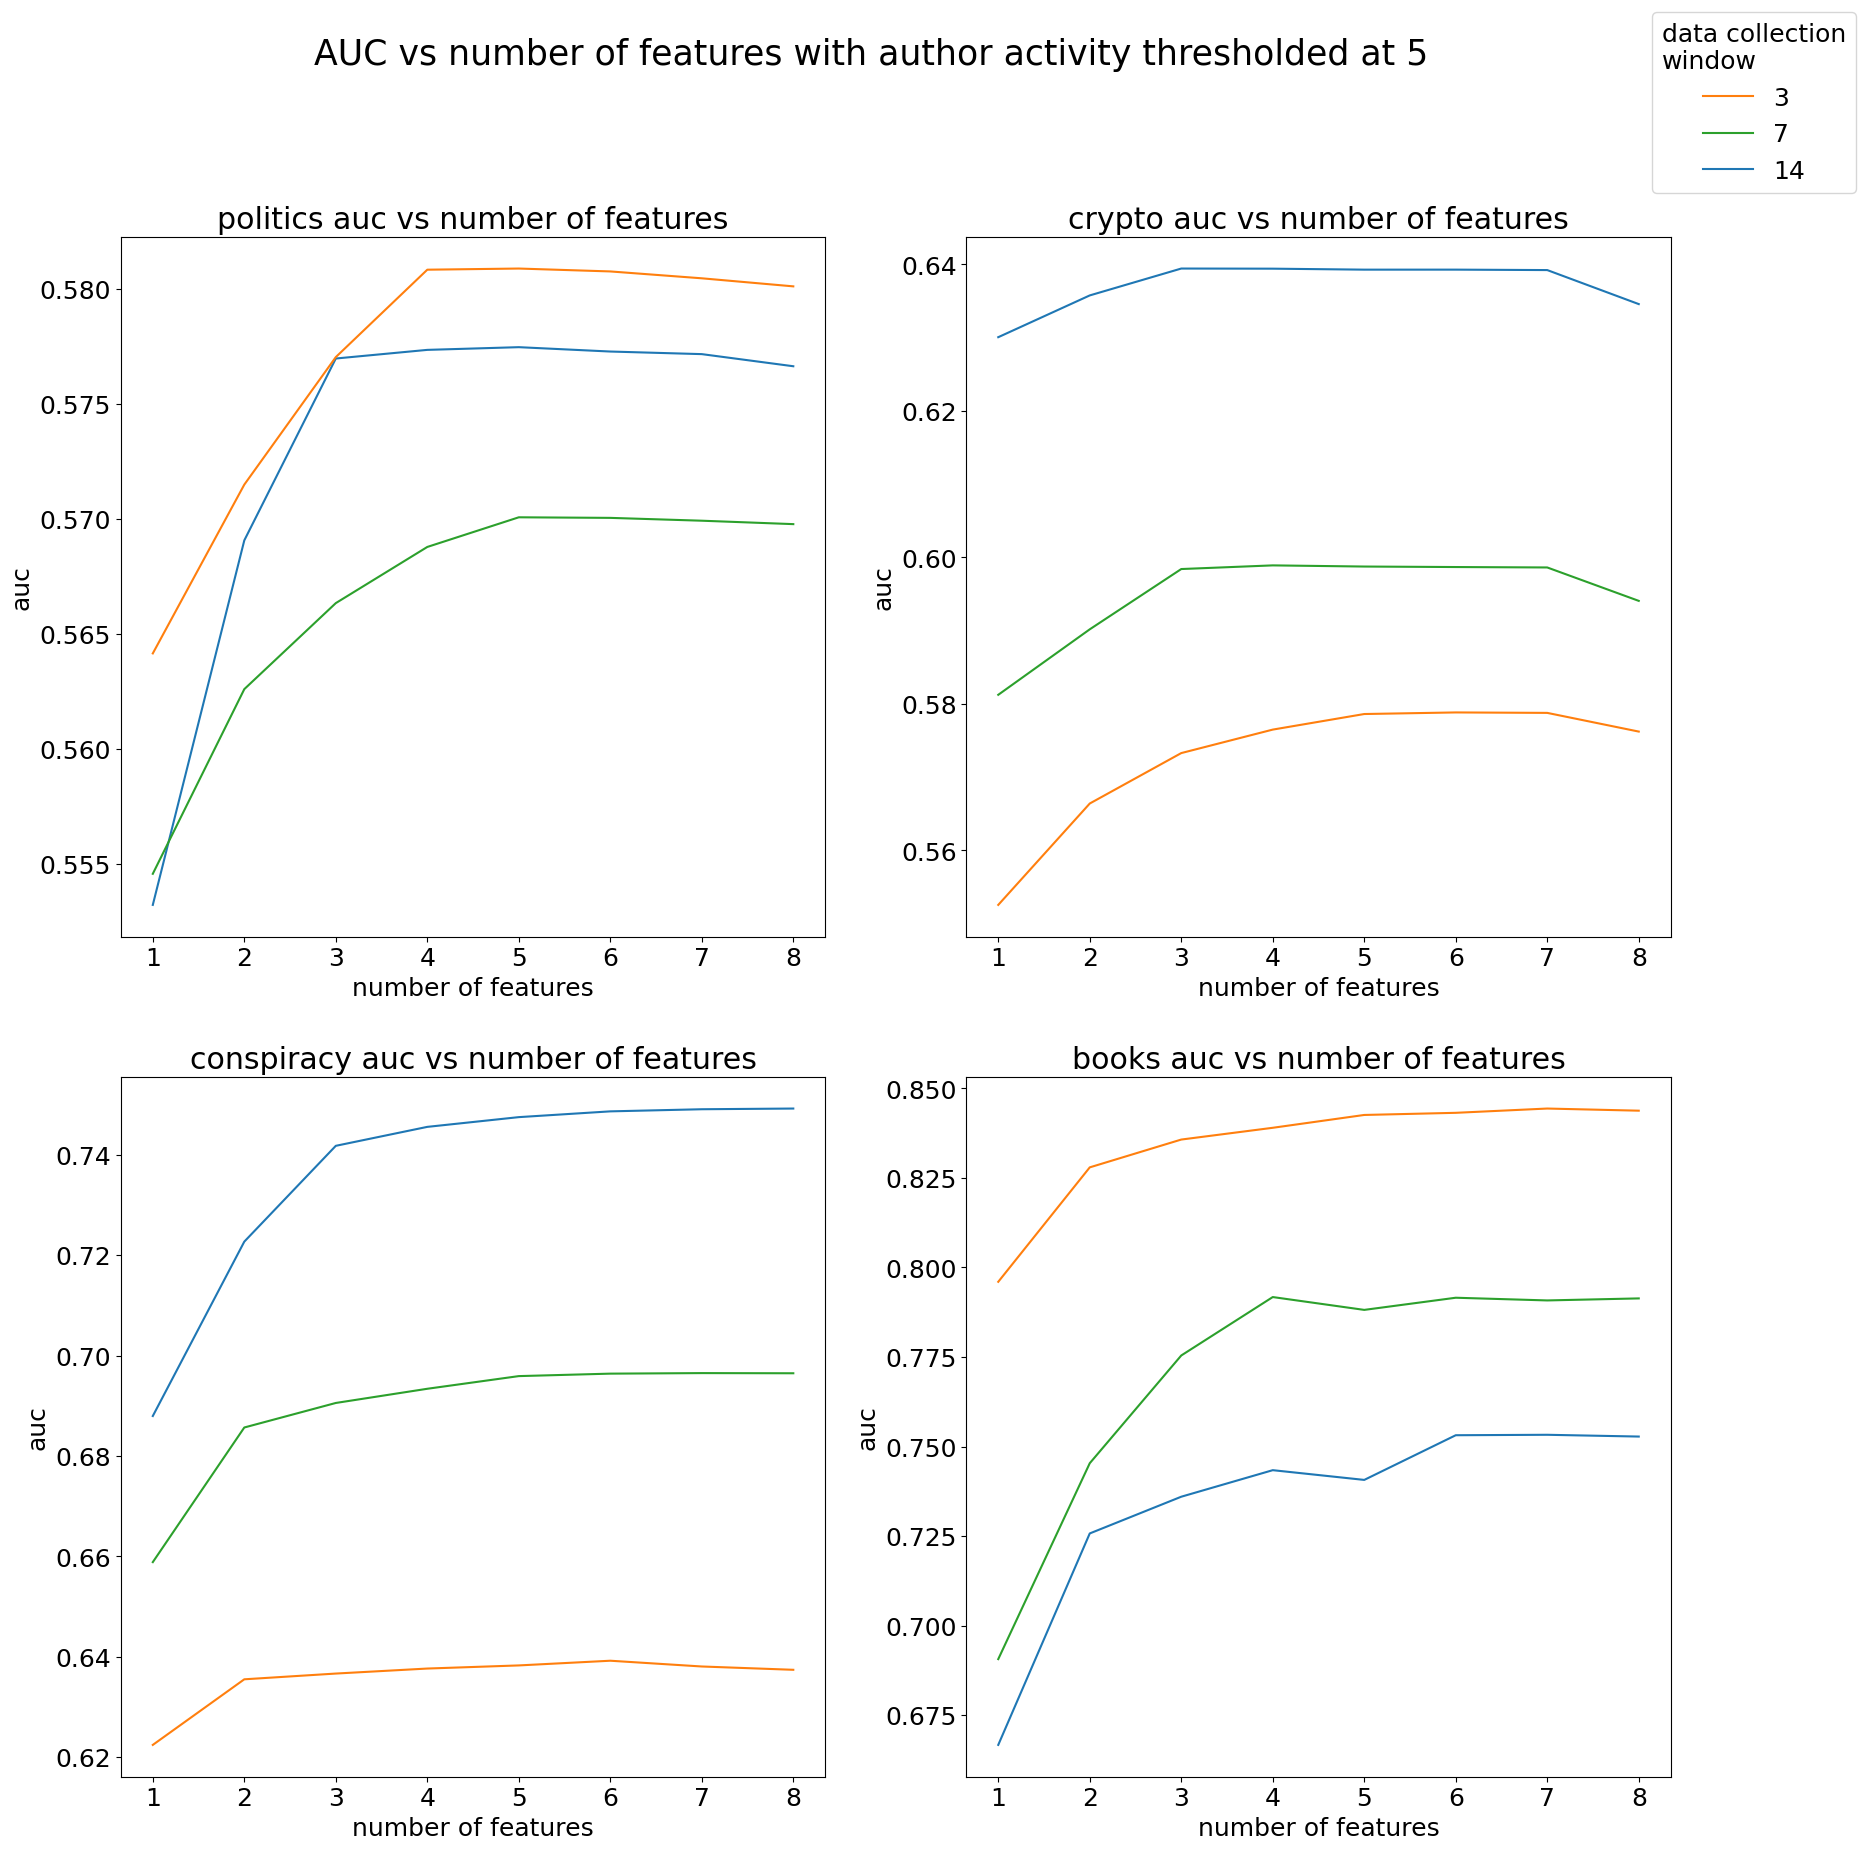

In [46]:
for author_threshold in metrics:
    plot_metrics_over_multi_collection_windows(metrics[author_threshold], author_threshold,
                                               save=True)